In [1]:
%load_ext autoreload
%autoreload 2
import oogeso.io
import oogeso.plots as plots
import IPython.display
import ipywidgets
import pprint
import logging
logging.basicConfig(level="INFO",format="%(asctime)s %(levelname)s [%(name)s.%(funcName)s:%(lineno)d] %(message)s")

In [2]:
energy_system = oogeso.io.read_data_from_yaml("../tests/test_data/testdata1.yaml")

In [3]:
simulator = oogeso.Simulator(data=energy_system)

2022-01-25 09:30:51,263 INFO [oogeso.core.optimiser.__init__:45] profiles in use: []
2022-01-25 09:30:51,268 INFO [oogeso.core.optimiser._specify_objective:321] Using objective function: penalty


In [4]:
yy=[""]+list(simulator.optimiser.component_objects(oogeso.optimiser.pyo.Constraint, active=True))
@ipywidgets.interact(constraint=yy)
def showdata(constraint):
    pprint.pprint(constraint.pprint(),width=1) if constraint!="" else print("")

interactive(children=(Dropdown(description='constraint', options=('', <pyomo.core.base.constraint.IndexedConst…

In [5]:
# Active objective(s):
for ob in simulator.optimiser.component_objects(oogeso.optimiser.pyo.Objective, active=True): 
    ob.pprint()

objObjective : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : (varDevicePenalty[source1,el,out,0] + varDevicePenalty[source1,el,out,1])/2


In [6]:
res = simulator.run_simulation(solver="cbc",time_range=[0,4])

100%|██████████| 4/4 [00:00<00:00,  7.03it/s]


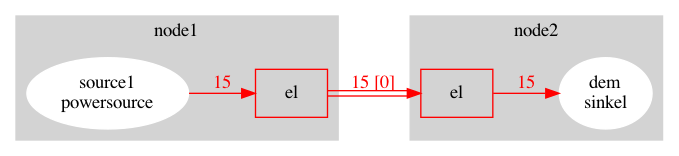

In [7]:
try:
    IPython.display.Image(plots.plot_network(simulator,timestep=1).create_png())
except:
    pass

In [8]:
res_str=oogeso.dto.serialisation.serialize_oogeso_data(res)
# with open("testdata1_result.json","w") as f:
#    f.write(res_str)

In [9]:
res2=oogeso.dto.serialisation.deserialize_oogeso_results(res_str)

In [10]:
(res.edge_flow["el1",]==15).all()

True

In [11]:
#oogeso.plots.plot_sum_power_mix(res,optimisation_model=simulator.optimiser,carrier="el")

In [12]:
res.co2_rate_per_dev.unstack("device")

device,dem,source1
time,,
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
